In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion = keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion.load_data()

Image Label: 2


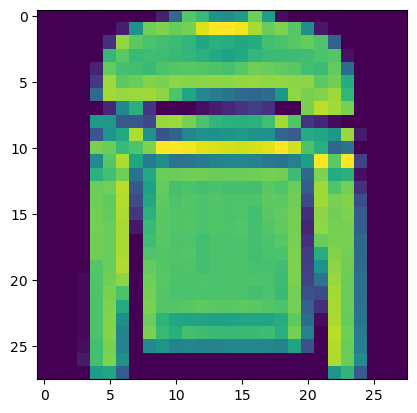

In [10]:
imgindex=5
image = xtrain[imgindex]
print("Image Label:",ytrain[imgindex])
plt.imshow(image)

In [12]:
print(xtrain.shape,xtest.shape)

(60000, 28, 28) (10000, 28, 28)


In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=30,
                 validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7083 - accuracy: 0.7663 - val_loss: 0.5021 - val_accuracy: 0.8360
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4892 - accuracy: 0.8307 - val_loss: 0.4590 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4454 - accuracy: 0.8451 - val_loss: 0.4309 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4183 - accuracy: 0.8543 - val_loss: 0.4278 - val_accuracy: 0.8458
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8616 - val_loss: 0.3912 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3822 - accuracy: 0.8654 - val_loss: 0.3794 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3685 - accuracy: 0.8699 - val_loss: 0.3617 - val_accuracy:

In [16]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 105ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.7895613e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.9999416e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [17]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
